In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [44]:

data = pd.read_csv("~/desktop/Stormdata_1998.csv",encoding = "ISO-8859-1")

In [45]:
data

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,EPISODE_NARRATIVE,EVENT_NARRATIVE,LAST_MOD_DATE,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE
0,199801,1,0,199801,31,2359,1072033,5628839,GEORGIA,13,...,Savannah River at Burton's Ferry (Screven Coun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,199801,1,0,199801,26,800,1073671,5634223,FLORIDA,12,...,NaN,The Withlacoochee River at Croom crested at 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,199801,1,0,199801,25,800,1073670,5634222,FLORIDA,12,...,NaN,The Withlacoochee River rose to 16.3 feet on t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,199801,1,0,199801,14,800,1073669,5634221,FLORIDA,12,...,NaN,The Cypress Creek at Worthington Gardens along...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,199801,1,0,199801,1,2100,1073668,5634220,FLORIDA,12,...,NaN,The Hillsborough River at Hillsborough State P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,199812,31,2359,199812,31,2359,1151388,5673744,PENNSYLVANIA,42,...,The 1998 yearly mean temperature of 58.1 degre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50969,199812,31,2359,199812,31,2359,1151389,5673764,NEW JERSEY,34,...,1998 was the warmest year on record in the sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50970,199812,31,2359,199812,31,2359,1151389,5673767,NEW JERSEY,34,...,1998 was the warmest year on record in the sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50971,199812,31,2359,199812,31,2359,1151389,5673768,NEW JERSEY,34,...,1998 was the warmest year on record in the sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#dropping unwanted columns in the dataset
data = data.drop(data.columns[[0,1,2,3,4,5,10,21,23,26,30,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,
                               49,50,51,52,53,54,55,56,57]],axis = 1)

In [47]:
#Removing the attributes containing na values
data=data.dropna(axis=1,how="all")

In [48]:
data

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,...,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,1072033,5628839,GEORGIA,13,January,Flood,Z,88,SCREVEN,CHS,...,1/31/1998 23:59,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1073671,5634223,FLORIDA,12,January,Flood,C,53,HERNANDO,TBW,...,1/26/1998 8:00,0,0,100K,0,NaN,NaN,NaN,NaN,NaN
2,1073670,5634222,FLORIDA,12,January,Flood,C,101,PASCO,TBW,...,1/25/1998 8:00,0,0,500K,0,NaN,NaN,NaN,NaN,NaN
3,1073669,5634221,FLORIDA,12,January,Flood,C,101,PASCO,TBW,...,1/14/1998 8:00,0,0,10K,0,NaN,NaN,NaN,NaN,NaN
4,1073668,5634220,FLORIDA,12,January,Flood,C,57,HILLSBOROUGH,TBW,...,1/1/1998 21:00,0,0,100K,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,1151388,5673744,PENNSYLVANIA,42,December,Heat,Z,69,BUCKS,PHI,...,12/31/1998 23:59,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50969,1151389,5673764,NEW JERSEY,34,December,Heat,Z,7,WARREN,PHI,...,12/31/1998 23:59,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50970,1151389,5673767,NEW JERSEY,34,December,Heat,Z,13,WESTERN MONMOUTH,PHI,...,12/31/1998 23:59,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
50971,1151389,5673768,NEW JERSEY,34,December,Heat,Z,20,WESTERN OCEAN,PHI,...,12/31/1998 23:59,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data=data.fillna(0)
data

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,...,END_DATE_TIME,INJURIES_DIRECT,DEATHS_DIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,MAGNITUDE_TYPE,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH
0,1072033,5628839,GEORGIA,13,January,Flood,Z,88,SCREVEN,CHS,...,1/31/1998 23:59,0,0,0,0,0.0,0,0,0.0,0.0
1,1073671,5634223,FLORIDA,12,January,Flood,C,53,HERNANDO,TBW,...,1/26/1998 8:00,0,0,100K,0,0.0,0,0,0.0,0.0
2,1073670,5634222,FLORIDA,12,January,Flood,C,101,PASCO,TBW,...,1/25/1998 8:00,0,0,500K,0,0.0,0,0,0.0,0.0
3,1073669,5634221,FLORIDA,12,January,Flood,C,101,PASCO,TBW,...,1/14/1998 8:00,0,0,10K,0,0.0,0,0,0.0,0.0
4,1073668,5634220,FLORIDA,12,January,Flood,C,57,HILLSBOROUGH,TBW,...,1/1/1998 21:00,0,0,100K,0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50968,1151388,5673744,PENNSYLVANIA,42,December,Heat,Z,69,BUCKS,PHI,...,12/31/1998 23:59,0,0,0,0,0.0,0,0,0.0,0.0
50969,1151389,5673764,NEW JERSEY,34,December,Heat,Z,7,WARREN,PHI,...,12/31/1998 23:59,0,0,0,0,0.0,0,0,0.0,0.0
50970,1151389,5673767,NEW JERSEY,34,December,Heat,Z,13,WESTERN MONMOUTH,PHI,...,12/31/1998 23:59,0,0,0,0,0.0,0,0,0.0,0.0
50971,1151389,5673768,NEW JERSEY,34,December,Heat,Z,20,WESTERN OCEAN,PHI,...,12/31/1998 23:59,0,0,0,0,0.0,0,0,0.0,0.0


In [63]:
#the first one tells the number of rows and the secong  one tells the number of columns
size=data.shape
print(size)

(50973, 22)


In [65]:
#displaying the mean,standard deviation,min and max value of the data set

data1=data.describe()
print(data1)

         EPISODE_ID      EVENT_ID    STATE_FIPS    MONTH_NAME       CZ_FIPS  \
count  5.097300e+04  5.097300e+04  50973.000000  50973.000000  50973.000000   
mean   1.014418e+06  5.652699e+06     30.410845      5.886960     79.730190   
std    2.784291e+05  1.478213e+04     15.468765      3.023738     83.325578   
min    5.507200e+04  5.627083e+06      1.000000      1.000000      1.000000   
25%    1.074564e+06  5.639901e+06     19.000000      4.000000     23.000000   
50%    1.078946e+06  5.652692e+06     30.000000      6.000000     59.000000   
75%    1.084054e+06  5.665503e+06     42.000000      7.000000    110.000000   
max    1.151786e+06  5.678291e+06     99.000000     12.000000    840.000000   

       INJURIES_DIRECT  DEATHS_DIRECT     MAGNITUDE    TOR_LENGTH  \
count     50973.000000   50973.000000  50973.000000  50973.000000   
mean          0.218527       0.013438     10.766697      0.081265   
std           7.394486       0.278228     21.849761      1.151790   
min         

In [66]:
#displaying the frequency count of event type
data['EVENT_TYPE'].value_counts()

Thunderstorm Wind      13603
Hail                   12561
Flash Flood             3582
Flood                   2318
Heavy Snow              2197
High Wind               2165
Winter Storm            2025
Drought                 1774
Tornado                 1529
Heat                    1404
Ice Storm               1158
Heavy Rain               981
Strong Wind              920
Lightning                901
Winter Weather           833
Cold/Wind Chill          505
Funnel Cloud             442
Dense Fog                407
Blizzard                 389
High Surf                299
Hurricane (Typhoon)      191
Waterspout               176
Tropical Storm           144
Coastal Flood            123
Wildfire                 113
Storm Surge/Tide          55
Sleet                     50
Rip Current               38
Lake-Effect Snow          36
Avalanche                 17
Frost/Freeze              12
Dust Storm                10
Seiche                     8
Dust Devil                 4
Debris Flow   

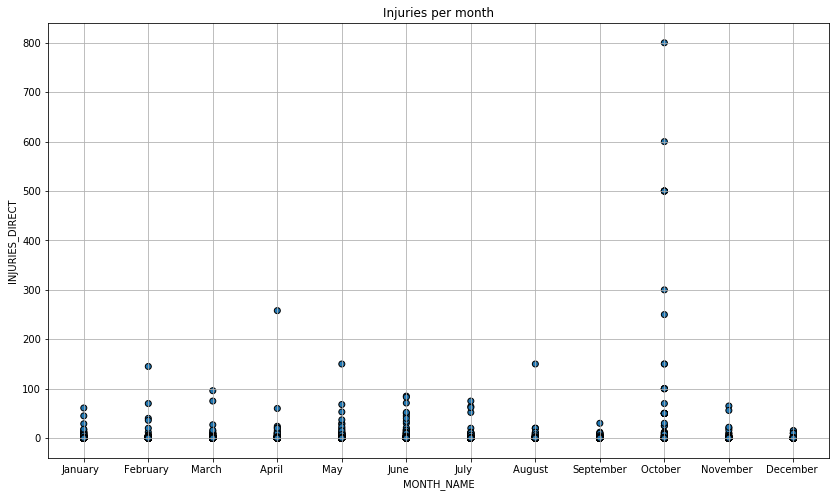

In [50]:
#scatter plot for Injuries direct and month name
plt.figure(figsize=(14,8))

sns.scatterplot(x=data["MONTH_NAME"], y=data["INJURIES_DIRECT"],linewidth=1,edgecolor="k"*len(data))
plt.grid(True)
plt.title("Injuries per month")
plt.show()

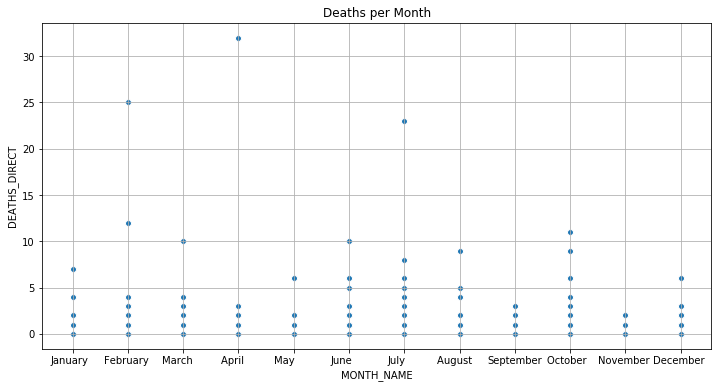

In [51]:
#scatter plot for deaths direct and month name
plt.figure(figsize=(12,6))

sns.scatterplot(x=data["MONTH_NAME"], y=data["DEATHS_DIRECT"],linewidth=1)
plt.grid(True)
plt.title("Deaths per Month")
plt.show()

In [52]:
#to display the correlation matrix
rs = np.random.RandomState(0)
cor = data.corr()
cor.style.background_gradient().set_precision(2)

,EPISODE_ID,EVENT_ID,STATE_FIPS,CZ_FIPS,INJURIES_DIRECT,DEATHS_DIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH
EPISODE_ID,1,0.084,-0.011,-0.032,0.003,0.0042,0.0063,0.0071,0.0076
EVENT_ID,0.084,1,0.072,-0.066,0.022,0.0062,0.049,-5.3e-05,-0.01
STATE_FIPS,-0.011,0.072,1,0.14,0.016,-0.0029,-0.084,-0.0059,0.0082
CZ_FIPS,-0.032,-0.066,0.14,1,0.018,0.0023,0.032,0.0098,0.012
INJURIES_DIRECT,0.003,0.022,0.016,0.018,1,0.29,-0.011,0.054,0.062
DEATHS_DIRECT,0.0042,0.0062,-0.0029,0.0023,0.29,1,-0.018,0.11,0.12
MAGNITUDE,0.0063,0.049,-0.084,0.032,-0.011,-0.018,1,-0.034,-0.035
TOR_LENGTH,0.0071,-5.3e-05,-0.0059,0.0098,0.054,0.11,-0.034,1,0.43
TOR_WIDTH,0.0076,-0.01,0.0082,0.012,0.062,0.12,-0.035,0.43,1


In [53]:
#to covert the cleaned data into new csv file
data.to_csv("~/Desktop/stormn_1998.csv")

In [55]:
#coverting the string data into numeric
MONTH = {'January  ': 1,'February ': 2,'March    ':3,'April    ':4,'May      ':5,'June     ':6,'July     ':7,'August   ':8,'September':9,'October  ':10,'November ':11,'December ':12} 
data.MONTH_NAME=[MONTH[item]for item in data.MONTH_NAME]

In [56]:
a=data.drop(data.columns[[0,1,2,5,6,7,8,9,10,11,12,15,16,17,18,19]],axis=1)
a

,STATE_FIPS,MONTH_NAME,INJURIES_DIRECT,DEATHS_DIRECT,TOR_LENGTH,TOR_WIDTH
0,13,1,0,0,0.0,0.0
1,12,1,0,0,0.0,0.0
2,12,1,0,0,0.0,0.0
3,12,1,0,0,0.0,0.0
4,12,1,0,0,0.0,0.0
...,...,...,...,...,...,...
50968,42,12,0,0,0.0,0.0
50969,34,12,0,0,0.0,0.0
50970,34,12,0,0,0.0,0.0
50971,34,12,0,0,0.0,0.0


In [57]:
#dividing the data training data anmd test data for clustering
from sklearn.model_selection import train_test_split
X=a
y=a["DEATHS_DIRECT"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [58]:
from sklearn.cluster import KMeans
model=KMeans()
model.fit(X_train,y_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[3377,    6, 4632,    3,   85,   14,    2, 4529,    0,    0,    0],
       [  21,    0,   29,    1,    1,    1,    0,   14,    0,    0,    0],
       [   6,    0,    9,    0,    1,    1,    0,    2,    0,    0,    0],
       [   0,    0,    2,    0,    1,    0,    0,    1,    0,    0,    0],
       [   2,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0]])

In [60]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test, y_pred,average='micro'))
print(recall_score(y_test, y_pred,average='micro'))

0.26569365976145637
0.26569365976145637


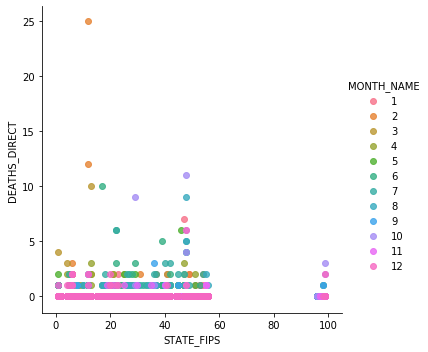

In [61]:
#Training graph
cluster = sns.lmplot(data=X_train, x='STATE_FIPS', y='DEATHS_DIRECT', hue = 'MONTH_NAME', 
                   fit_reg=False, legend=True, legend_out=True)

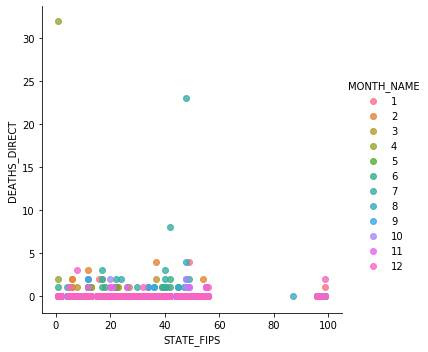

In [62]:
#testing graph
cluster = sns.lmplot(data=X_test, x='STATE_FIPS', y='DEATHS_DIRECT', hue = 'MONTH_NAME', 
                   fit_reg=False, legend=True, legend_out=True)

In [31]:
#network visualization on CZ name and event type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
network=nx.from_pandas_edgelist(data,'CZ_NAME','EVENT_TYPE')
network.nodes()

NodeView(('SCREVEN', 'Flood', 'HERNANDO', 'PASCO', 'HILLSBOROUGH', 'SARASOTA', 'ALEUTIAN ISLANDS', 'High Wind', 'BERKELEY', 'DORCHESTER', 'MAUI', 'Drought', 'ISLAND OF HAWAII', 'EFFINGHAM', 'DE SOTO', 'ARCTIC SLOPE COASTAL', 'Cold/Wind Chill', 'TATTNALL', 'Blizzard', 'GUAM', 'MICRONESIA', 'MARSHALL ISLANDS', 'HONOLULU', 'LINCOLN/W X LANE', 'High Surf', 'LANAI', 'KAUAI', 'OAHU', 'MOLOKAI', 'LAKE/KLAMATH T X W', 'Winter Storm', 'HICKMAN', 'Heavy Snow', 'BENTON', 'DICKSON', 'HUMPHREYS', 'PUTNAM', 'LAWRENCE', 'GREATER RENO/CARSON CITY/MINDEN AREA', 'CENTRAL OREGON', 'SWAINS', 'Hurricane (Typhoon)', 'TUTUILA', "MANU'A", 'ROSE', 'S WASHOE T X SE & X SW/STOREY/E CARSON CITY/C&E DOUGLAS/NW LYON', 'ADMIRALTY INLET AREA', 'W SKAGIT/NW SNOHOMISH', 'BOISE/N ELMORE/CAMAS', 'W GLACIER/W PONDERA/W TETON/N LEWIS/CLARK', 'E NEVADA/E PLACER/E EL DORADO/NE ALPINE', 'SONOMA', 'Heavy Rain', 'LARAMIE RANGE', 'SNOWY RANGE', 'PLATTE', 'SOUTHWEST CARBON', 'CITRUS', 'SOUTH CENTRAL OREGON', 'SAN MATEO', 'MILWAUK

In [32]:
#to display the network edges
network.edges()

EdgeView([('SCREVEN', 'Flood'), ('SCREVEN', 'Hail'), ('SCREVEN', 'Tornado'), ('SCREVEN', 'Heat'), ('SCREVEN', 'Thunderstorm Wind'), ('Flood', 'HERNANDO'), ('Flood', 'PASCO'), ('Flood', 'HILLSBOROUGH'), ('Flood', 'SARASOTA'), ('Flood', 'BERKELEY'), ('Flood', 'DORCHESTER'), ('Flood', 'EFFINGHAM'), ('Flood', 'DE SOTO'), ('Flood', 'TATTNALL'), ('Flood', 'HONOLULU'), ('Flood', 'CITRUS'), ('Flood', 'HENRY'), ('Flood', 'TANGIPAHOA'), ('Flood', 'ORLEANS'), ('Flood', 'ST. TAMMANY'), ('Flood', 'JOHNSON'), ('Flood', 'CHARITON'), ('Flood', 'SHELBY'), ('Flood', 'CAPE GIRARDEAU'), ('Flood', 'WARREN'), ('Flood', 'VERMILLION'), ('Flood', 'TIPPECANOE'), ('Flood', 'PARKE'), ('Flood', 'FOUNTAIN'), ('Flood', 'BROOME'), ('Flood', 'OTSEGO'), ('Flood', 'DELAWARE'), ('Flood', 'TIOGA'), ('Flood', 'STEUBEN'), ('Flood', 'MIAMI'), ('Flood', 'CASS'), ('Flood', 'CARROLL'), ('Flood', 'CORTLAND'), ('Flood', 'CHENANGO'), ('Flood', 'CHEMUNG'), ('Flood', 'STANLY'), ('Flood', 'ASSUMPTION'), ('Flood', 'WASHINGTON'), ('Flo

(-0.7911306542664749,
 0.7432322425156814,
 -0.7590158291335711,
 1.0921076245780597)

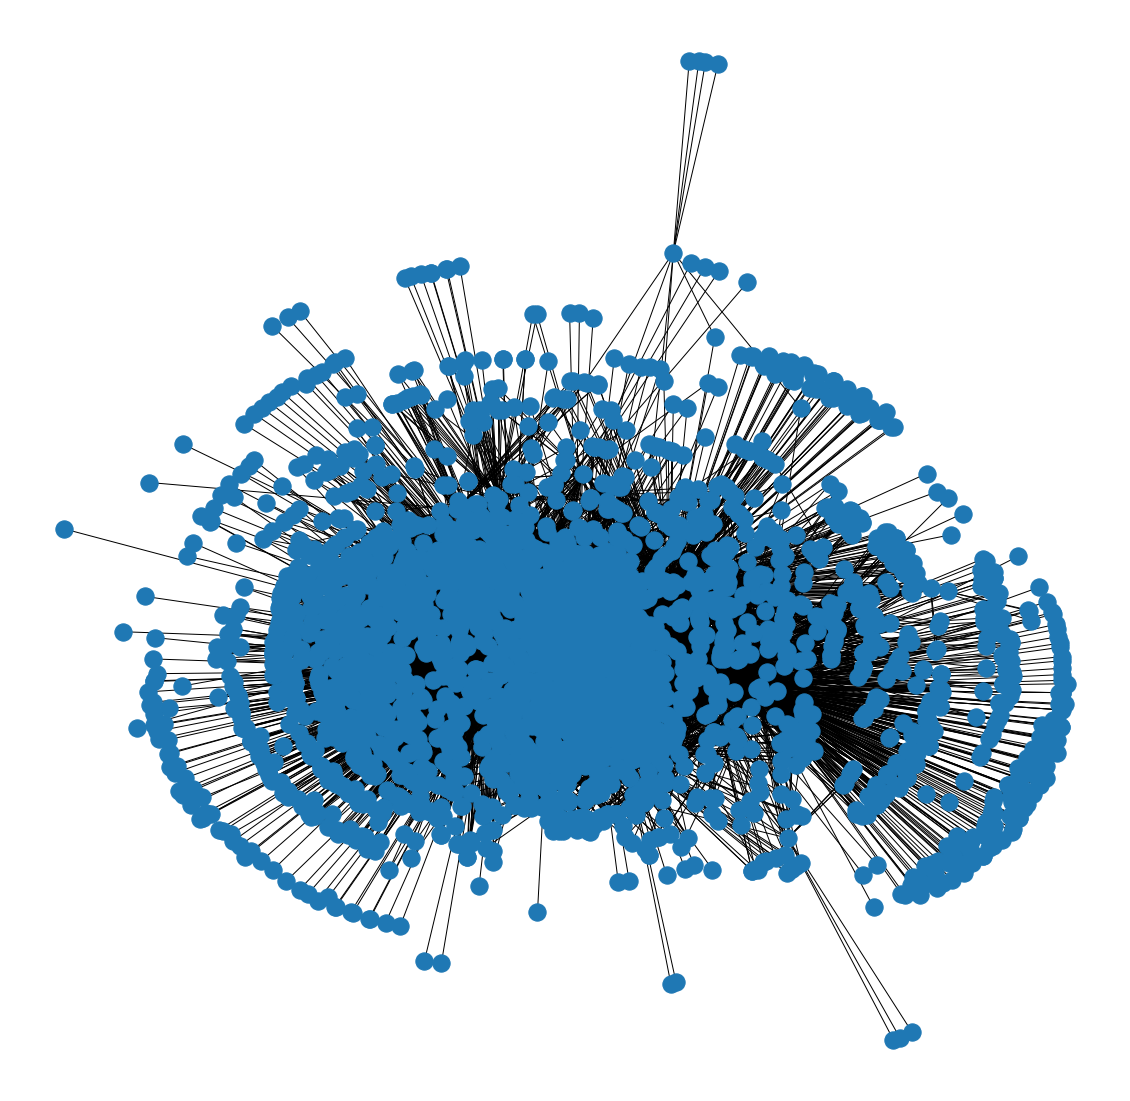

In [38]:
a=nx.spring_layout(network)
centrality=nx.betweenness_centrality(network,normalized=True,endpoints=True)
color_node=[20000.0*network.degree(v) for v in network]
size_node=[v * 10000 for v in centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(network,pos=a,with_labels=False,
                color_node=color_node,
                size_node=size_node)
plt.axis('off')

In [39]:
nx.density(network)

0.003515087575182848

In [40]:
nx.average_shortest_path_length(network)

2.685229733012804

In [67]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=2, n_jobs=-1, oob_score=True)
rnd_clf.fit(X_test, y_test)

print("Accuracy on training set: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rnd_clf.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.998
